                                               Employee Fitment

                                Amazon Hiring : Bussness Research Analyst - 1  (Assignment)

In [658]:
sub=pd.read_csv("sample submission.csv")

In [455]:
try:
    import os
    from sklearn.linear_model import LinearRegression
    from sklearn.svm import SVR
    from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from lightgbm import LGBMRegressor
    from catboost import CatBoostRegressor
    import numpy as np
    from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold,train_test_split
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.metrics import roc_auc_score
    import statsmodels.api as sm
    from sklearn.preprocessing import LabelEncoder
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    sns.set_style('whitegrid')
    plt.style.use('seaborn-deep')
    plt.style.use('fivethirtyeight')
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.serif'] = 'Ubuntu'
    plt.rcParams['font.monospace'] = 'Ubuntu Mono'
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['xtick.labelsize'] = 8
    plt.rcParams['ytick.labelsize'] = 8
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.titlesize'] = 14
    plt.rcParams['figure.figsize'] = (12, 8)
    import warnings
    warnings.filterwarnings('ignore')
    import sklearn.base as skb
    import sklearn.metrics as skm
    import sklearn.model_selection as skms
    import sklearn.preprocessing as skp
    import sklearn.utils as sku
    import sklearn.linear_model as sklm
    from sklearn.impute import KNNImputer
    import sklearn.neighbors as skn
    import sklearn.ensemble as ske
    import catboost as cb
    import scipy.stats as sstats
    import pandas as pd
    import random
    seed = 12
    np.random.seed(seed)
    from datetime import date
    print("Hey Great, all libraries dependencies are successfully Installed.")
except Exception as e:
    print("Message:  Oh! Library {} is not installed or having same issues.".format(str(e)))
    print("\n\n Please Install this  module name  {} using pip command ".format(str(e)[-20:]))

Hey Great, all libraries dependencies are successfully Installed.


# Data Importing  from localhost using Class-Function methods.

In [179]:
class file_importing():
    import os
    try:
        def file_importing(self,file_path):
            if "xlsx" in str(file_path) or "xls" in str(file_path):
                df=pd.read_excel(file_path)
                return df
            elif "csv" in str(file_path):
                df=pd.read_csv(file_path)
                return df
            else:
                print("Hey! You are not using any file")
            
    except Exception as ex:
        print("Error Excetion type: ",str(ex))
import pandas as pd
entries = os.listdir()
with os.scandir(r'Test') as entries:
    for entry in entries:
        test=file_importing().file_importing(entry)
with os.scandir('Train') as entries:
    for entry in entries:
        train=file_importing().file_importing(entry)
        


In [623]:
with os.scandir('Train') as entries:
    for entry in entries:
        train_2copy=file_importing().file_importing(entry)

# method : seprate the data into numerical and categorical form

In [180]:
def split_data_into_cat_and_num(dataframe):
    numerical_data=dataframe.select_dtypes(include=np.number)
    categorical_data=dataframe.select_dtypes(exclude=np.number)
    return numerical_data,categorical_data

    

# Method: Finding co-related columns in which are co-related more than 0.70 

In [387]:
def generate_correlated_columns(dataframe,thres):
    column_having_correlation=set()
    cor_relation_matrix=numerical_data.corr()
    for i in range(len(cor_relation_matrix.columns)):
        for j in range(i):
            if cor_relation_matrix.iloc[i,j]>thres:
                column_having_correlation.add(cor_relation_matrix.columns[i])
    return column_having_correlation

#  Required Methods for data pre-processing.

In [456]:
# remove the skewed data points
def reduce_skewness(dataframe):
    for i in range(len(dataframe.columns)):
        if dataframe[dataframe.columns[i]].skew()>0:
            dataframe[dataframe.columns[i]]=dataframe[dataframe.columns[i]].map(lambda i: np.log(i) if i > 0 else 0) 
        else:
            continue

    return dataframe
#checking outliers of each features by using box-plot
def Outliers_visualization_using_boxplot(dataframe,column_name):
    fig = plt.figure(figsize=(16, 6))
    box_plot=plt.boxplot(dataframe[column_name])
    title=plt.title(str(column_name))
    legend=plt.legend()
    return box_plot,title,legend
# creating dummy data of categorical features
def create_dummies_data(dataframe,feature_list):
    dummies_data=pd.get_dummies(dataframe[feature_list])
    return dummies_data
#Checking frequancies in_each feature
def check_frequancies_in_each_feature(dataframe,features_list):
    for i in range(len(features_list)):
        print("feature name {} having frequencies \n".format(dataframe.columns[i]),dataframe[dataframe.columns[i]].value_counts(),"\n\n")

# Encoding the features values from word(char) to numeric vector by using Label_Encoder Scikit Library
def genrate_numeric_encoding(dataframe,feature_name):
    Encoder_obj=LabelEncoder()
    encoded_feature=Encoder_obj.fit_transform(dataframe[feature_name])
    return encoded_feature

In [358]:

numerical_data,categorical_data=split_data_into_cat_and_num(train)

numerical_data_test,categorical_data_test=split_data_into_cat_and_num(test)


In [359]:
categorical_data.shape,numerical_data.shape

((13645, 12), (13645, 10))


# numeric data analysis

In [363]:
numerical_data_test.head()

EmpID  Age  LatestDegreeCGPA  YearsOfExperince  GraduationYear  CurrentCTC  \
0   5664   35                 5                 5            2016          27   
1  23568   35                 9                12            2009          29   
2  21490   28                 9                 2            2019          18   
3   8363   37                 8                11            2010           7   
4   6165   36                 7                 6            2015          22   

   ExpectedCTC  EmpScore  TotalLeavesTaken  
0           34         4                18  
1           33         4                 8  
2           25         3                18  
3           12         5                17  
4           32         4                 9

In [364]:
numerical_data=numerical_data.drop(['EmpID'],1)
Need_ID=numerical_data_test.EmpID
numerical_data_test=numerical_data_test.drop('EmpID',1)

In [365]:
numerical_data_test.head()

Age  LatestDegreeCGPA  YearsOfExperince  GraduationYear  CurrentCTC  \
0   35                 5                 5            2016          27   
1   35                 9                12            2009          29   
2   28                 9                 2            2019          18   
3   37                 8                11            2010           7   
4   36                 7                 6            2015          22   

   ExpectedCTC  EmpScore  TotalLeavesTaken  
0           34         4                18  
1           33         4                 8  
2           25         3                18  
3           12         5                17  
4           32         4                 9

In [186]:
numerical_data.head()

Age  LatestDegreeCGPA  YearsOfExperince  GraduationYear  CurrentCTC  \
0   35                 7                12            2009          21   
1   26                 7                 3            2018          15   
2   36                 6                 6            2015          15   
3   29                 5                 6            2015          16   
4   25                 8                 2            2019          24   

   ExpectedCTC  EmpScore  TotalLeavesTaken  FitmentPercent  
0           26         5                20           95.40  
1           19         5                 6           67.09  
2           24         5                19           91.26  
3           24         5                16           72.29  
4           32         5                10           86.34

# Outliers data point visualiization using BOXPLOT

No handles with labels found to put in legend.


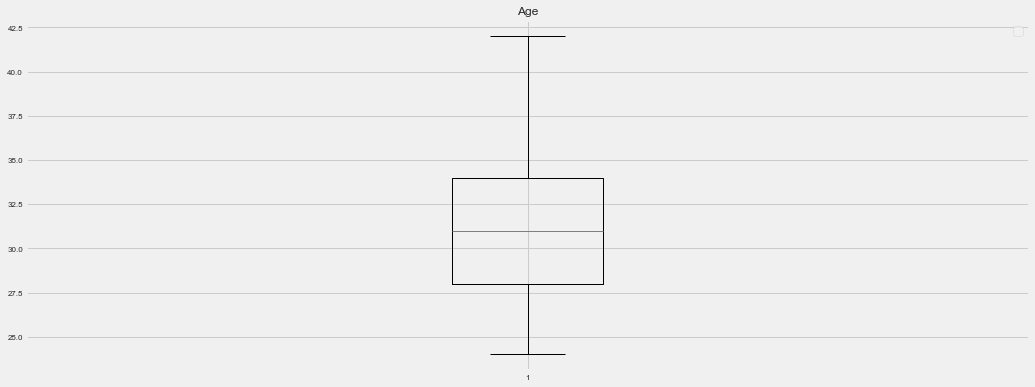

No handles with labels found to put in legend.


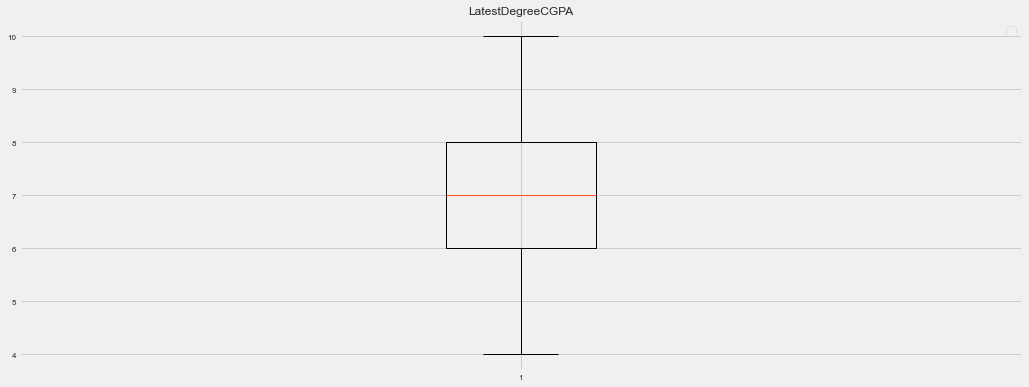

No handles with labels found to put in legend.


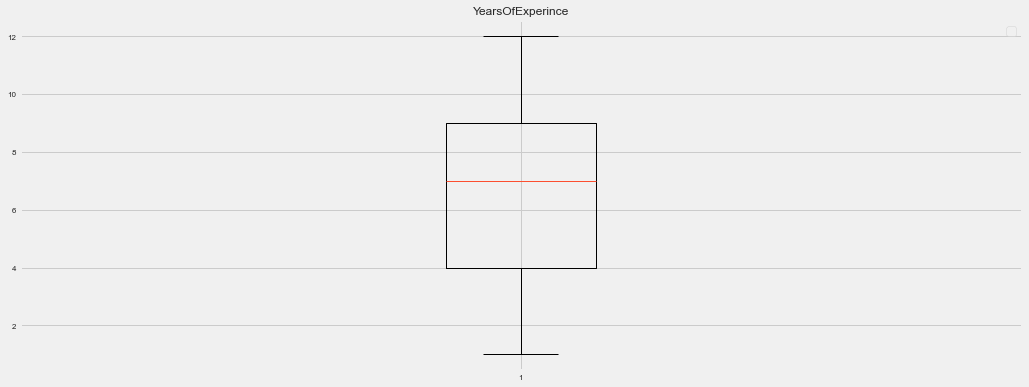

No handles with labels found to put in legend.


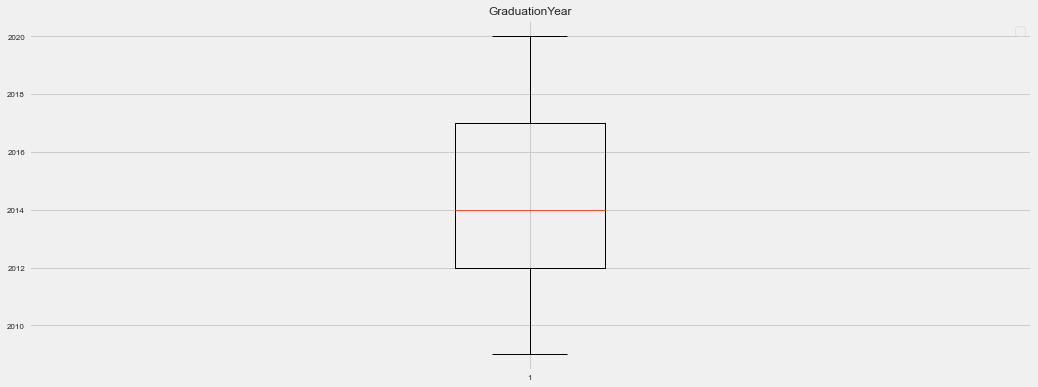

No handles with labels found to put in legend.


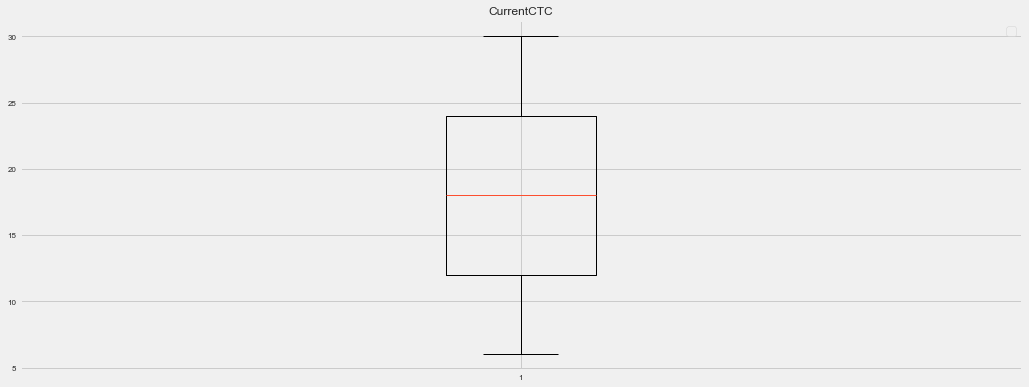

No handles with labels found to put in legend.


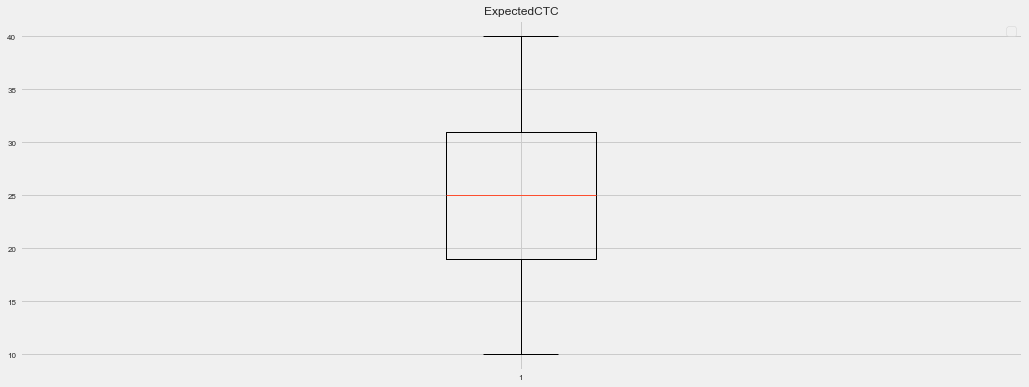

No handles with labels found to put in legend.


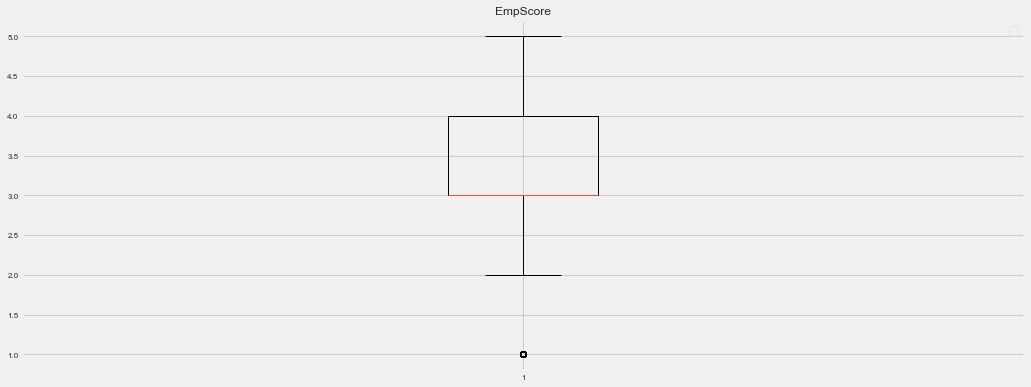

No handles with labels found to put in legend.


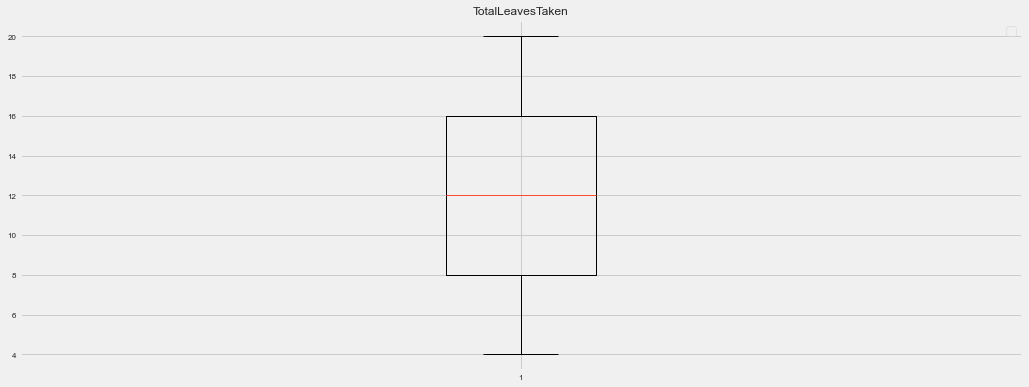

No handles with labels found to put in legend.


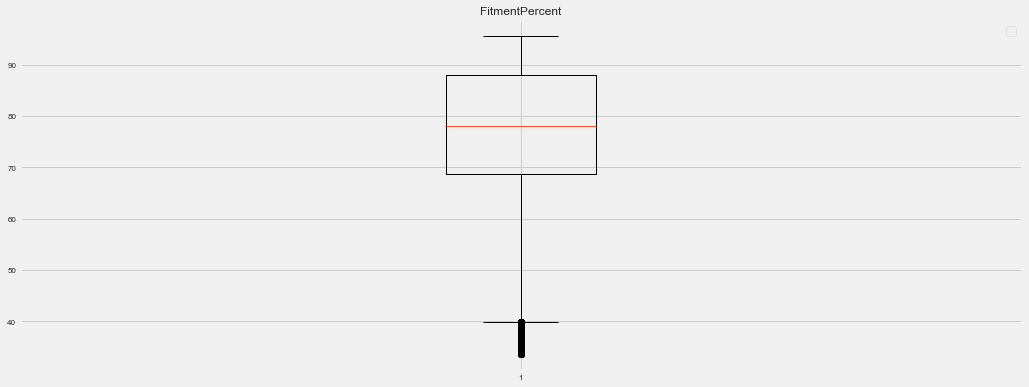

No handles with labels found to put in legend.


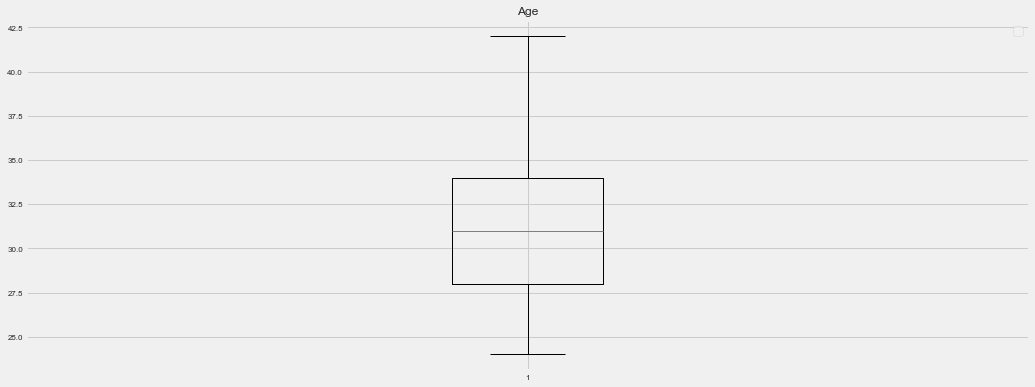

No handles with labels found to put in legend.


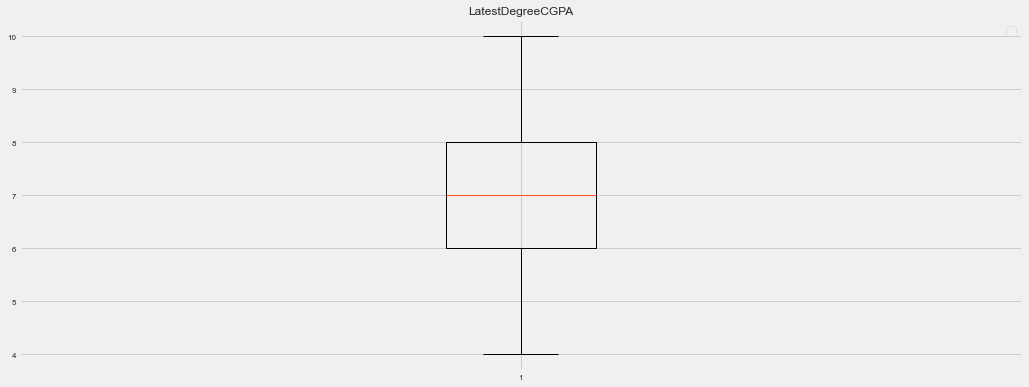

No handles with labels found to put in legend.


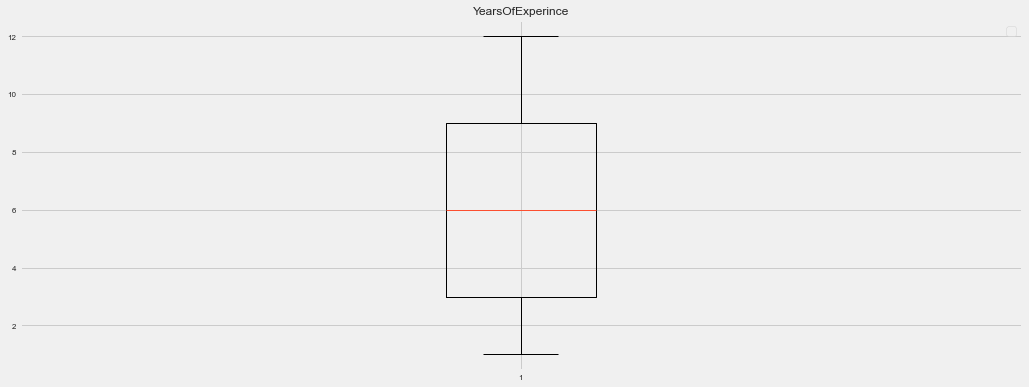

No handles with labels found to put in legend.


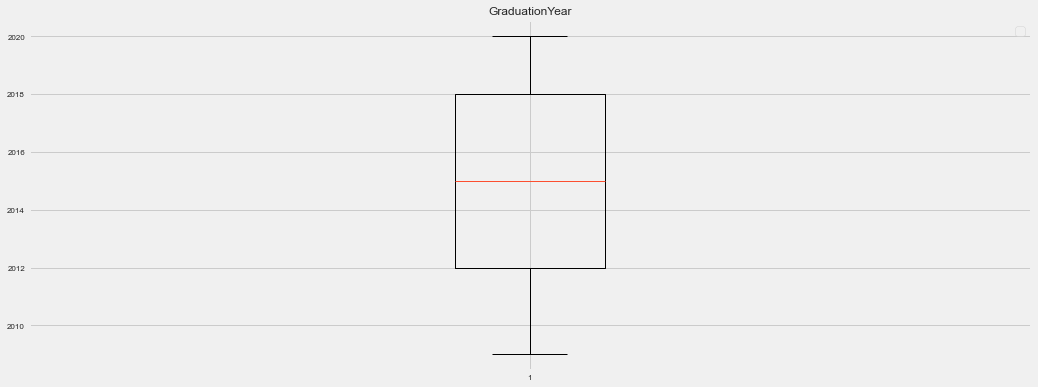

No handles with labels found to put in legend.


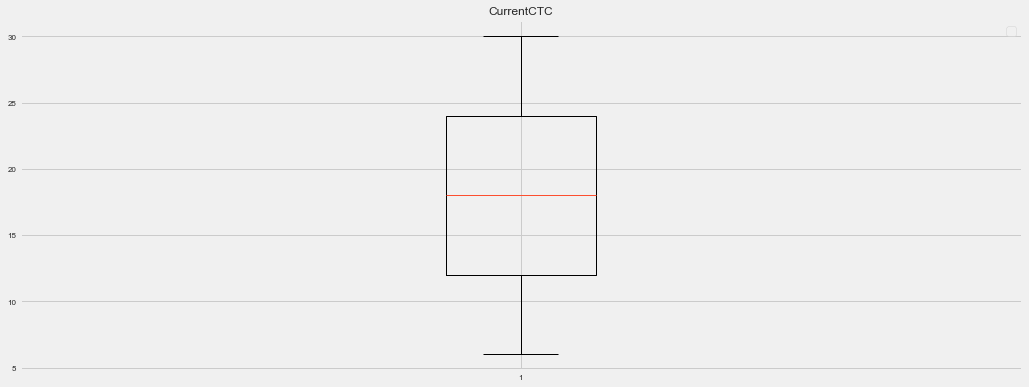

No handles with labels found to put in legend.


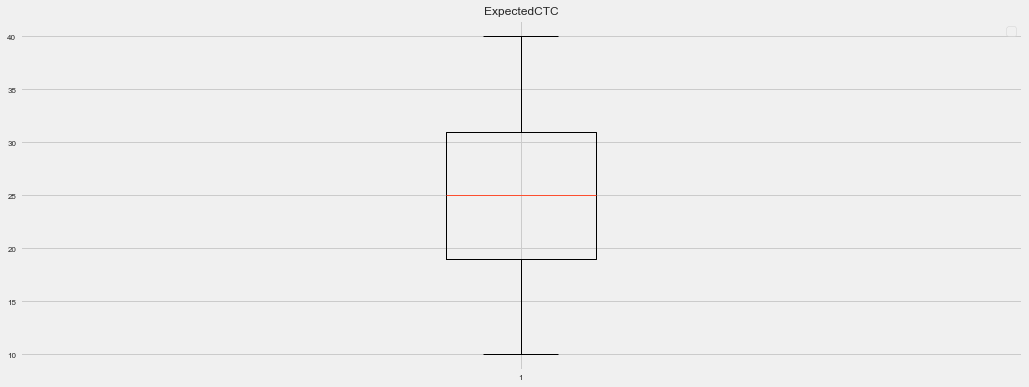

No handles with labels found to put in legend.


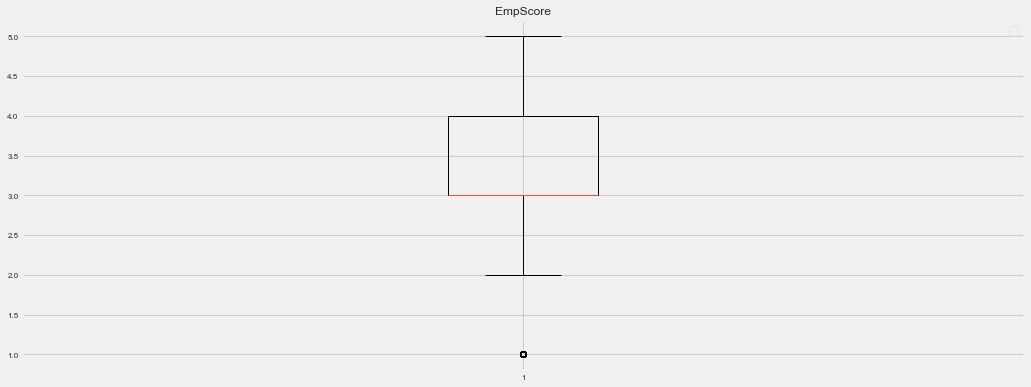

No handles with labels found to put in legend.


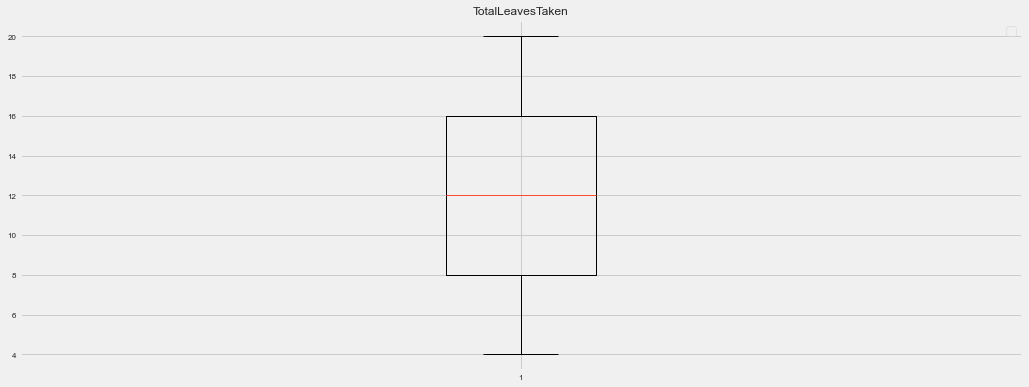

In [366]:

for i in range(len(numerical_data.columns)):
    Outliers_visualization_using_boxplot(numerical_data,numerical_data.columns[i])
    plt.show()
for i in range(len(numerical_data_test.columns)):
    Outliers_visualization_using_boxplot(numerical_data_test,numerical_data_test.columns[i])
    plt.show()
    

#     ax[0,1].boxplot(numerical_data.LatestDegreeCGPA)
#     ax[0,1].set_title("LatestDegreeCGPA")

#     ax[1,0].boxplot(numerical_data.YearsOfExperince)
#     ax[1,0].set_title("YearsOfExperince")

#     ax[1,1].boxplot(numerical_data.GraduationYear)
#     ax[1,1].set_title("GraduationYear")

#     ax[2,0].boxplot(numerical_data.CurrentCTC)
#     ax[2,0].set_title("CurrentCTC")

#     ax[2,1].boxplot(numerical_data.ExpectedCTC)
#     ax[2,1].set_title("ExpectedCTC")

#     ax[3,0].boxplot(numerical_data.EmpScore)
#     ax[3,0].set_title("EmpScore")

#     ax[3,1].boxplot(numerical_data.TotalLeavesTaken)
#     ax[3,1].set_title("TotalLeavesTaken")

#     ax[4,0].boxplot(numerical_data.FitmentPercent)
#     ax[4,0].set_title("FitmentPercent")
    



In [189]:
numerical_data.corr() # printing corelation matrix

Age  LatestDegreeCGPA  YearsOfExperince  \
Age               1.000000         -0.016065          0.879819   
LatestDegreeCGPA -0.016065          1.000000         -0.017794   
YearsOfExperince  0.879819         -0.017794          1.000000   
GraduationYear   -0.879819          0.017794         -1.000000   
CurrentCTC       -0.002504         -0.000750         -0.004947   
ExpectedCTC      -0.002661          0.000851         -0.007795   
EmpScore          0.001010         -0.005073         -0.002773   
TotalLeavesTaken  0.002090          0.003413          0.001517   
FitmentPercent   -0.014188          0.011049         -0.008466   

                  GraduationYear  CurrentCTC  ExpectedCTC  EmpScore  \
Age                    -0.879819   -0.002504    -0.002661  0.001010   
LatestDegreeCGPA        0.017794   -0.000750     0.000851 -0.005073   
YearsOfExperince       -1.000000   -0.004947    -0.007795 -0.002773   
GraduationYear          1.000000    0.004947     0.007795  0.002773   
CurrentCTC              0.004947    1.000000     0.963368  0.007050   
ExpectedCTC             0.007795    0.963368     1.000000  0.005020   
EmpScore                0.002773    0.007050     0.005020  1.000000   
TotalLeavesTaken       -0.001517   -0.015754    -0.017024  0.008744   
FitmentPercent          0.008466    0.139495     0.133717  0.140494   

                  TotalLeavesTaken  FitmentPercent  
Age                       0.002090       -0.014188  
LatestDegreeCGPA          0.003413        0.011049  
YearsOfExperince          0.001517       -0.008466  
GraduationYear           -0.001517        0.008466  
CurrentCTC               -0.015754        0.139495  
ExpectedCTC              -0.017024        0.133717  
EmpScore                  0.008744        0.140494  
TotalLeavesTaken          1.000000       -0.013438  
FitmentPercent           -0.013438        1.000000

In [367]:
numerical_data_test.corr()

Age  LatestDegreeCGPA  YearsOfExperince  \
Age               1.000000          0.002609          0.874446   
LatestDegreeCGPA  0.002609          1.000000         -0.000878   
YearsOfExperince  0.874446         -0.000878          1.000000   
GraduationYear   -0.874446          0.000878         -1.000000   
CurrentCTC        0.011101          0.010908          0.005956   
ExpectedCTC       0.008476          0.009832          0.003153   
EmpScore         -0.006467          0.012274         -0.003952   
TotalLeavesTaken -0.007964         -0.013423         -0.013481   

                  GraduationYear  CurrentCTC  ExpectedCTC  EmpScore  \
Age                    -0.874446    0.011101     0.008476 -0.006467   
LatestDegreeCGPA        0.000878    0.010908     0.009832  0.012274   
YearsOfExperince       -1.000000    0.005956     0.003153 -0.003952   
GraduationYear          1.000000   -0.005956    -0.003153  0.003952   
CurrentCTC             -0.005956    1.000000     0.962554  0.003317   
ExpectedCTC            -0.003153    0.962554     1.000000  0.001323   
EmpScore                0.003952    0.003317     0.001323  1.000000   
TotalLeavesTaken        0.013481   -0.004438    -0.000421 -0.005071   

                  TotalLeavesTaken  
Age                      -0.007964  
LatestDegreeCGPA         -0.013423  
YearsOfExperince         -0.013481  
GraduationYear            0.013481  
CurrentCTC               -0.004438  
ExpectedCTC              -0.000421  
EmpScore                 -0.005071  
TotalLeavesTaken          1.000000

In [190]:
numerical_data.Age.unique().tolist(),numerical_data.YearsOfExperince.unique().tolist()# check unique value of Age column

([35, 26, 36, 29, 25, 31, 32, 28, 30, 27, 34, 33, 24, 37, 38, 42, 41, 40, 39],
 [12, 3, 6, 2, 1, 9, 8, 5, 4, 7, 11, 10])

In [191]:
correlation_feature=generate_correlated_columns(numerical_data,0.8)
correlation_feature # corelated columns

{'ExpectedCTC', 'YearsOfExperince'}

In [368]:
correlation_feature=generate_correlated_columns(numerical_data_test,0.8)
correlation_feature # corelated columns

{'ExpectedCTC', 'YearsOfExperince'}

In [192]:
after_remove_co_related_data=numerical_data.drop(['ExpectedCTC', 'YearsOfExperince'],1) # remove co-related column from dataset.

In [369]:
after_remove_co_related_data_test=numerical_data_test.drop(['ExpectedCTC', 'YearsOfExperince'],1) # remove co-related column from dataset.

<AxesSubplot:>

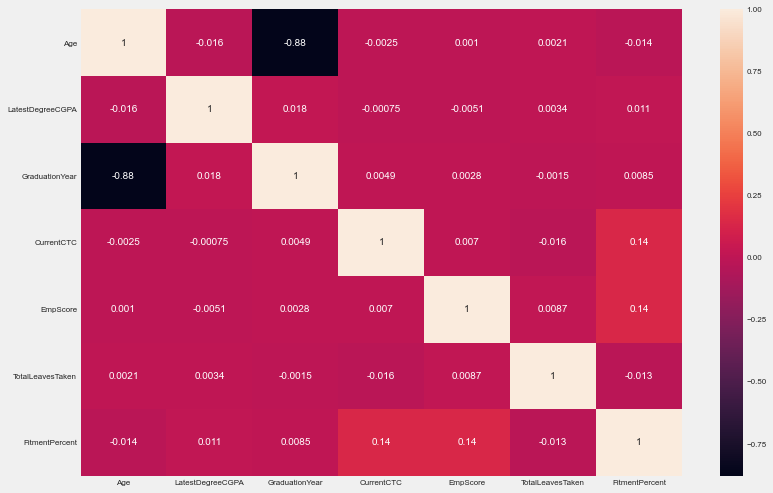

In [193]:
sns.heatmap(after_remove_co_related_data.corr(),annot=True)

<AxesSubplot:>

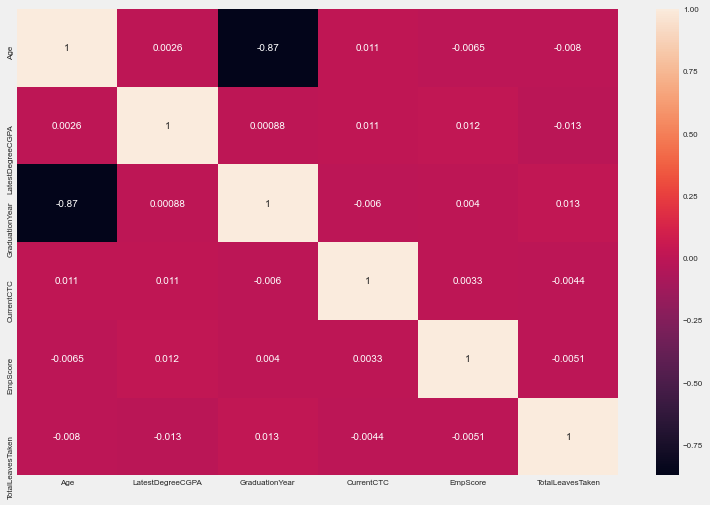

In [370]:
sns.heatmap(after_remove_co_related_data_test.corr(),annot=True)

In [194]:
# firstly we ignoring high corelated fetures,

In [195]:
skewed_features = after_remove_co_related_data.apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features # skewed value of each column of dataframe

Age                 0.162296
GraduationYear      0.015501
TotalLeavesTaken    0.010280
CurrentCTC         -0.010166
LatestDegreeCGPA   -0.402332
EmpScore           -0.404885
FitmentPercent     -0.966175
dtype: float64

In [371]:
skewed_features = after_remove_co_related_data_test.apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features # skewed value of each column of dataframe

Age                 0.189183
TotalLeavesTaken    0.024743
CurrentCTC         -0.002615
GraduationYear     -0.019726
EmpScore           -0.392569
LatestDegreeCGPA   -0.397131
dtype: float64

In [196]:
after_remove_co_related_data.describe() # checking statistics details of dataset.


Age  LatestDegreeCGPA  GraduationYear    CurrentCTC  \
count  13645.000000      13645.000000    13645.000000  13645.000000   
mean      30.691242          7.100257     2014.452254     18.076951   
std        3.881378          1.346539        3.426920      7.208130   
min       24.000000          4.000000     2009.000000      6.000000   
25%       28.000000          6.000000     2012.000000     12.000000   
50%       31.000000          7.000000     2014.000000     18.000000   
75%       34.000000          8.000000     2017.000000     24.000000   
max       42.000000         10.000000     2020.000000     30.000000   

           EmpScore  TotalLeavesTaken  FitmentPercent  
count  13645.000000      13645.000000    13645.000000  
mean       3.392085         11.967021       75.880093  
std        1.044676          4.897836       14.894207  
min        1.000000          4.000000       33.530000  
25%        3.000000          8.000000       68.720000  
50%        3.000000         12.000000       78.110000  
75%        4.000000         16.000000       87.990000  
max        5.000000         20.000000       95.500000

In [372]:
after_remove_co_related_data_test.describe() # checking statistics details of dataset.


Age  LatestDegreeCGPA  GraduationYear   CurrentCTC  \
count  8745.000000       8745.000000     8745.000000  8745.000000   
mean     30.675472          7.111378     2014.535392    18.019325   
std       3.934141          1.338240        3.458010     7.154050   
min      24.000000          4.000000     2009.000000     6.000000   
25%      28.000000          6.000000     2012.000000    12.000000   
50%      31.000000          7.000000     2015.000000    18.000000   
75%      34.000000          8.000000     2018.000000    24.000000   
max      42.000000         10.000000     2020.000000    30.000000   

          EmpScore  TotalLeavesTaken  
count  8745.000000       8745.000000  
mean      3.388222         11.925214  
std       1.057420          4.928806  
min       1.000000          4.000000  
25%       3.000000          8.000000  
50%       3.000000         12.000000  
75%       4.000000         16.000000  
max       5.000000         20.000000

In [197]:
#checking outliers using inter-quartile-range method
Q1 = after_remove_co_related_data.quantile(0.25)
Q3 = after_remove_co_related_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                  6.00
LatestDegreeCGPA     2.00
GraduationYear       5.00
CurrentCTC          12.00
EmpScore             1.00
TotalLeavesTaken     8.00
FitmentPercent      19.27
dtype: float64


In [373]:
#checking outliers using inter-quartile-range method
Q1 = after_remove_co_related_data_test.quantile(0.25)
Q3 = after_remove_co_related_data_test.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                  6.0
LatestDegreeCGPA     2.0
GraduationYear       6.0
CurrentCTC          12.0
EmpScore             1.0
TotalLeavesTaken     8.0
dtype: float64


# features engineering.....


In [198]:
after_remove_co_related_data.head()

Age  LatestDegreeCGPA  GraduationYear  CurrentCTC  EmpScore  \
0   35                 7            2009          21         5   
1   26                 7            2018          15         5   
2   36                 6            2015          15         5   
3   29                 5            2015          16         5   
4   25                 8            2019          24         5   

   TotalLeavesTaken  FitmentPercent  
0                20           95.40  
1                 6           67.09  
2                19           91.26  
3                16           72.29  
4                10           86.34

In [199]:
after_remove_co_related_data.Age.value_counts(sort=True)

32    1207
34    1157
33    1140
29    1140
35    1122
31    1112
28    1105
27    1100
30    1060
26     744
25     733
24     721
37     375
38     365
36     353
41      62
40      56
39      52
42      41
Name: Age, dtype: int64

In [200]:
min(after_remove_co_related_data.Age),max(after_remove_co_related_data.Age)

(24, 42)

In [201]:
after_remove_co_related_data[(after_remove_co_related_data.Age>=24) & (after_remove_co_related_data.Age<=31)].skew()

Age                -0.214202
LatestDegreeCGPA   -0.403309
GraduationYear     -0.160756
CurrentCTC         -0.018954
EmpScore           -0.394605
TotalLeavesTaken    0.007316
FitmentPercent     -0.975828
dtype: float64

In [202]:
after_remove_co_related_data[(after_remove_co_related_data.Age>31) & (after_remove_co_related_data.Age<=36)].skew()

Age                 0.158411
LatestDegreeCGPA   -0.392157
GraduationYear      1.024479
CurrentCTC          0.000090
EmpScore           -0.408552
TotalLeavesTaken    0.029166
FitmentPercent     -0.967389
dtype: float64

In [203]:
after_remove_co_related_data[(after_remove_co_related_data.Age>36)].skew()

Age                 1.407798
LatestDegreeCGPA   -0.448057
GraduationYear      1.463783
CurrentCTC          0.007738
EmpScore           -0.468010
TotalLeavesTaken   -0.065623
FitmentPercent     -0.883281
dtype: float64

In [204]:
cor=after_remove_co_related_data.corr()
#Correlation with output variable
cor_target = abs(cor["FitmentPercent"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features # by this target variale not haing any corelated independent feature

FitmentPercent    1.0
Name: FitmentPercent, dtype: float64

# Backward Elimination : feature selection

In [205]:
X=after_remove_co_related_data.drop(['FitmentPercent'],1)
y=after_remove_co_related_data.FitmentPercent

In [206]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['CurrentCTC', 'EmpScore']


In [374]:
cols = list(after_remove_co_related_data_test.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['CurrentCTC', 'EmpScore']


In [375]:
after_remove_co_related_data.shape,after_remove_co_related_data_test.shape

((13645, 7), (8745, 6))

In [376]:
after_remove_co_related_data.columns,after_remove_co_related_data_test.columns

(Index(['Age', 'LatestDegreeCGPA', 'GraduationYear', 'CurrentCTC', 'EmpScore',
        'TotalLeavesTaken', 'FitmentPercent'],
       dtype='object'),
 Index(['Age', 'LatestDegreeCGPA', 'GraduationYear', 'CurrentCTC', 'EmpScore',
        'TotalLeavesTaken'],
       dtype='object'))

<AxesSubplot:>

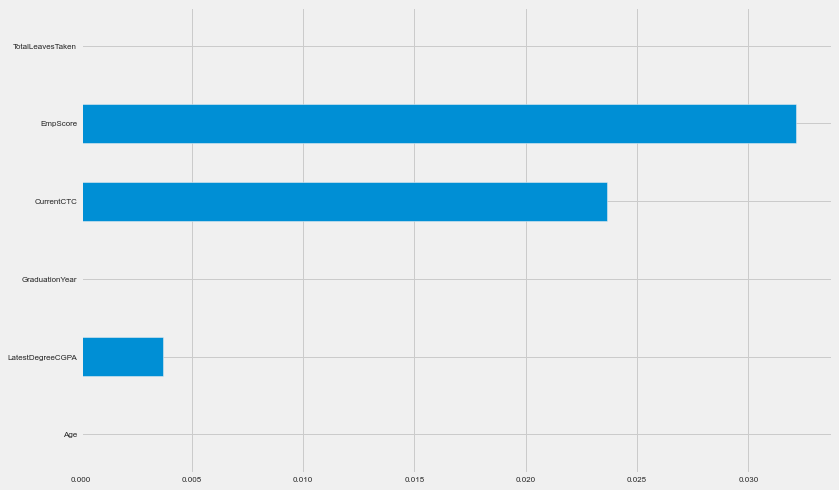

In [207]:
from sklearn.feature_selection import mutual_info_regression
important_feature=mutual_info_regression(X,y)
pd.Series(important_feature,index=X.columns).plot(kind='barh') # according to the this technique only 2 feature are importnat.

In [208]:
categorical_data.head()

EmpName LanguageOfCommunication  Gender JobProfileIDApplyingFor  \
0     John                 English    Male                 JR85289   
1  William                 English    Male                 JR87525   
2    James                 English  Female                 JR87525   
3  Charles                 English  Female                 JR87525   
4   George                 English    Male                 JR70175   

  HighestDegree             DegreeBranch GraduatingInstitute MartialStatus  \
0        B.Tech               Electrical              Tier 1       Married   
1        B.Tech  Artificial Intelligence              Tier 3       Married   
2           PhD         Computer Science              Tier 1        Single   
3           BCA   Information Technology              Tier 2       Married   
4   Dual M.Tech         Computer Science              Tier 3       Married   

  CurrentDesignation CurrentCompanyType DepartmentInCompany  \
0                SSE         Enterprise              Design   
1                 BA           MidSized         Engineering   
2                SDE           MidSized         Engineering   
3                SDE            Startup             Product   
4                SDE         Enterprise         Engineering   

  BiasInfluentialFactor  
0      YearsOfExperince  
1                   NaN  
2                Gender  
3                Gender  
4          DegreeBranch

Frequnacy od each data points:
 English    4771
Hindi      3088
Native      886
Name: LanguageOfCommunication, dtype: int64


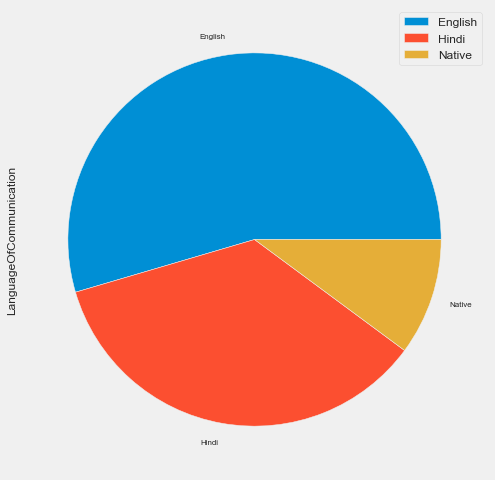

In [382]:
categorical_data_test.LanguageOfCommunication.value_counts().plot(kind="pie")
plt.legend()
print("Frequnacy od each data points:\n",categorical_data_test.LanguageOfCommunication.value_counts())

Frequnacy od each data points:
 English    7510
Hindi      4733
Native     1402
Name: LanguageOfCommunication, dtype: int64


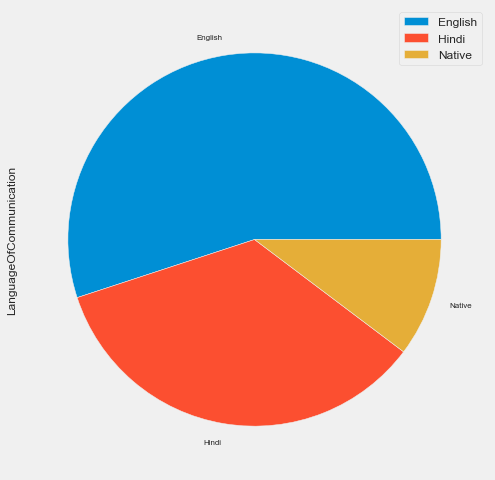

In [383]:
categorical_data.LanguageOfCommunication.value_counts().plot(kind="pie")
plt.legend()

print("Frequnacy od each data points:\n",categorical_data.LanguageOfCommunication.value_counts())

In [210]:
from sklearn.preprocessing import OneHotEncoder

In [211]:
categorical_data.head()

EmpName LanguageOfCommunication  Gender JobProfileIDApplyingFor  \
0     John                 English    Male                 JR85289   
1  William                 English    Male                 JR87525   
2    James                 English  Female                 JR87525   
3  Charles                 English  Female                 JR87525   
4   George                 English    Male                 JR70175   

  HighestDegree             DegreeBranch GraduatingInstitute MartialStatus  \
0        B.Tech               Electrical              Tier 1       Married   
1        B.Tech  Artificial Intelligence              Tier 3       Married   
2           PhD         Computer Science              Tier 1        Single   
3           BCA   Information Technology              Tier 2       Married   
4   Dual M.Tech         Computer Science              Tier 3       Married   

  CurrentDesignation CurrentCompanyType DepartmentInCompany  \
0                SSE         Enterprise              Design   
1                 BA           MidSized         Engineering   
2                SDE           MidSized         Engineering   
3                SDE            Startup             Product   
4                SDE         Enterprise         Engineering   

  BiasInfluentialFactor  
0      YearsOfExperince  
1                   NaN  
2                Gender  
3                Gender  
4          DegreeBranch

In [385]:
categorical_data_test=categorical_data_test.drop(['EmpName'],1)

In [212]:
categorical_data=categorical_data.drop(['EmpName'],1)

In [398]:
categorical_data

EmpName LanguageOfCommunication  Gender JobProfileIDApplyingFor  \
0         John                 English    Male                 JR85289   
1      William                 English    Male                 JR87525   
2        James                 English  Female                 JR87525   
3      Charles                 English  Female                 JR87525   
4       George                 English    Male                 JR70175   
...        ...                     ...     ...                     ...   
13640   Perley                 English  Female                 JR87525   
13641  Randall                  Native   Other                 JR87525   
13642  Raphael                   Hindi    Male                 JR88873   
13643     Reed                   Hindi    Male                 JR87525   
13644   Shelby                 English    Male                 JR87525   

      HighestDegree             DegreeBranch GraduatingInstitute  \
0            B.Tech               Electrical              Tier 1   
1            B.Tech  Artificial Intelligence              Tier 3   
2               PhD         Computer Science              Tier 1   
3               BCA   Information Technology              Tier 2   
4       Dual M.Tech         Computer Science              Tier 3   
...             ...                      ...                 ...   
13640      Dual MBA               Electrical              Tier 2   
13641   Dual M.Tech         Computer Science              Tier 1   
13642        M.Tech  Artificial Intelligence              Tier 1   
13643        B.Tech               Electrical              Tier 2   
13644        B.Tech               Electrical              Tier 2   

      MartialStatus CurrentDesignation CurrentCompanyType DepartmentInCompany  \
0           Married                SSE         Enterprise              Design   
1           Married                 BA           MidSized         Engineering   
2            Single                SDE           MidSized         Engineering   
3           Married                SDE            Startup             Product   
4           Married                SDE         Enterprise         Engineering   
...             ...                ...                ...                 ...   
13640       Married                SDE            Startup         Engineering   
13641       Married                SSE            Startup    Customer Success   
13642        Single                SDE         Enterprise              Design   
13643        Single                SDE           MidSized         Engineering   
13644        Single                SSE            Startup         Engineering   

      BiasInfluentialFactor  
0          YearsOfExperince  
1                       NaN  
2                    Gender  
3                    Gender  
4              DegreeBranch  
...                     ...  
13640                Gender  
13641                   NaN  
13642    CurrentCompanyType  
13643              EmpScore  
13644      YearsOfExperince  

[13645 rows x 12 columns]

In [399]:
from sklearn.datasets import make_regression
from sklearn.svm import LinearSVR
# create datasets
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=2, random_state=1)
# define model

In [403]:
y

array([[ -93.14714589,   23.26984981],
       [-159.82996948,  -38.76040427],
       [ 115.70672087,  -53.7138275 ],
       ...,
       [  40.53985101,  -60.31289684],
       [ -64.02736992,   36.24948836],
       [ 271.96129428,   -6.79700623]])

In [402]:
check_frequancies_in_each_feature(categorical_data,categorical_data.columns.tolist())

feature name EmpName having frequencies 
 Johnie     14
June       14
Noble      14
Lorenzo    14
Sidney     14
           ..
Dixon       1
Atha        1
Fremont     1
Bose        1
Elby        1
Name: EmpName, Length: 1766, dtype: int64 


feature name LanguageOfCommunication having frequencies 
 English    7510
Hindi      4733
Native     1402
Name: LanguageOfCommunication, dtype: int64 


feature name Gender having frequencies 
 Male      8376
Female    4326
Other      943
Name: Gender, dtype: int64 


feature name JobProfileIDApplyingFor having frequencies 
 JR85289    4697
JR87525    3416
JR88879    1231
JR89890    1157
JR88873    1123
JR81165     681
JR79193     678
JR88654     420
JR70175     242
Name: JobProfileIDApplyingFor, dtype: int64 


feature name HighestDegree having frequencies 
 B.Tech         5619
M.Tech         2026
BCA            1634
MS             1579
Dual M.Tech    1358
Dual MBA        665
PhD             624
MCA             140
Name: HighestDegree, dtype: int64

In [392]:
test

EmpID    EmpName LanguageOfCommunication  Age  Gender  \
0      5664       Theo                  Native   35    Male   
1     23568     Vernie                 English   35    Male   
2     21490    Wendell                 English   28    Male   
3      8363       West                   Hindi   37    Male   
4      6165     Alford                   Hindi   36  Female   
...     ...        ...                     ...  ...     ...   
8740  14758       Matt                 English   26  Female   
8741  23544  Salvatore                   Hindi   27    Male   
8742  16175     Adrian                 English   27    Male   
8743  18458    Ambrose                 English   33    Male   
8744  10036     Arther                  Native   26   Other   

     JobProfileIDApplyingFor HighestDegree                DegreeBranch  \
0                    JR85289           PhD      Information Technology   
1                    JR85289        B.Tech      Information Technology   
2                    JR87525        M.Tech     Artificial Intelligence   
3                    JR87525            MS            Computer Science   
4                    JR85289           PhD     Artificial Intelligence   
...                      ...           ...                         ...   
8740                 JR85289        B.Tech            Computer Science   
8741                 JR85289            MS                  Electrical   
8742                 JR85289        B.Tech            Computer Science   
8743                 JR79193            MS  Electrical and Electronics   
8744                 JR89890   Dual M.Tech      Information Technology   

     GraduatingInstitute  LatestDegreeCGPA  YearsOfExperince  GraduationYear  \
0                 Tier 2                 5                 5            2016   
1                 Tier 3                 9                12            2009   
2                 Tier 2                 9                 2            2019   
3                 Tier 2                 8                11            2010   
4                 Tier 2                 7                 6            2015   
...                  ...               ...               ...             ...   
8740              Tier 1                10                 3            2018   
8741              Tier 1                10                 1            2020   
8742              Tier 2                 7                 4            2017   
8743              Tier 1                 7                 7            2014   
8744              Tier 2                 9                 3            2018   

      CurrentCTC  ExpectedCTC MartialStatus  EmpScore CurrentDesignation  \
0             27           34        Single         4                SDE   
1             29           33       Married         4                 EM   
2             18           25       Married         3                SDE   
3              7           12        Single         5                 DS   
4             22           32       Married         4                SDE   
...          ...          ...           ...       ...                ...   
8740          29           38       Married         5                SDE   
8741          18           26       Married         4                 BA   
8742           7           17       Married         4                SDE   
8743           8           18       Married         4                SSE   
8744          29           34        Single         3                SDE   

     CurrentCompanyType DepartmentInCompany  TotalLeavesTaken  
0            Enterprise             Finance                18  
1            Enterprise         Engineering                 8  
2               Startup         Engineering                18  
3            Enterprise             Product                17  
4               Startup         Engineering                 9  
...                 ...                 ...               ...  
8740            Startup              D

In [391]:
check_frequancies_in_each_feature(categorical_data_test,categorical_data_test.columns.tolist())

feature name LanguageOfCommunication having frequencies 
 English    4771
Hindi      3088
Native      886
Name: LanguageOfCommunication, dtype: int64 


feature name Gender having frequencies 
 Male      5405
Female    2697
Other      643
Name: Gender, dtype: int64 


feature name JobProfileIDApplyingFor having frequencies 
 JR85289    3011
JR87525    2196
JR88879     802
JR88873     725
JR89890     719
JR79193     439
JR81165     420
JR88654     259
JR70175     174
Name: JobProfileIDApplyingFor, dtype: int64 


feature name HighestDegree having frequencies 
 B.Tech         3497
M.Tech         1329
BCA            1072
MS             1046
Dual M.Tech     854
PhD             461
Dual MBA        407
MCA              79
Name: HighestDegree, dtype: int64 


feature name DegreeBranch having frequencies 
 Computer Science              3024
Information Technology        1921
Artificial Intelligence       1376
Electrical                    1131
Electronics                   1034
Electrical and 

In [439]:
categorical_data_rem=categorical_data.drop(['EmpName','BiasInfluentialFactor'],1)

In [440]:
categorical_data_rem.columns

Index(['LanguageOfCommunication', 'Gender', 'JobProfileIDApplyingFor',
       'HighestDegree', 'DegreeBranch', 'GraduatingInstitute', 'MartialStatus',
       'CurrentDesignation', 'CurrentCompanyType', 'DepartmentInCompany'],
      dtype='object')

In [441]:
categorical_data_rem.head()

LanguageOfCommunication  Gender JobProfileIDApplyingFor HighestDegree  \
0                 English    Male                 JR85289        B.Tech   
1                 English    Male                 JR87525        B.Tech   
2                 English  Female                 JR87525           PhD   
3                 English  Female                 JR87525           BCA   
4                 English    Male                 JR70175   Dual M.Tech   

              DegreeBranch GraduatingInstitute MartialStatus  \
0               Electrical              Tier 1       Married   
1  Artificial Intelligence              Tier 3       Married   
2         Computer Science              Tier 1        Single   
3   Information Technology              Tier 2       Married   
4         Computer Science              Tier 3       Married   

  CurrentDesignation CurrentCompanyType DepartmentInCompany  
0                SSE         Enterprise              Design  
1                 BA           MidSized         Engineering  
2                SDE           MidSized         Engineering  
3                SDE            Startup             Product  
4                SDE         Enterprise         Engineering

In [442]:
# approx each features having more than 2 frequency so,we have to generate dummies data .
dummies_data=create_dummies_data(categorical_data_rem,categorical_data_rem.columns.tolist())

In [443]:
dummies_data

LanguageOfCommunication_English  LanguageOfCommunication_Hindi  \
0                                    1                              0   
1                                    1                              0   
2                                    1                              0   
3                                    1                              0   
4                                    1                              0   
...                                ...                            ...   
13640                                1                              0   
13641                                0                              0   
13642                                0                              1   
13643                                0                              1   
13644                                1                              0   

       LanguageOfCommunication_Native  Gender_Female  Gender_Male  \
0                                   0              0            1   
1                                   0              0            1   
2                                   0              1            0   
3                                   0              1            0   
4                                   0              0            1   
...                               ...            ...          ...   
13640                               0              1            0   
13641                               1              0            0   
13642                               0              0            1   
13643                               0              0            1   
13644                               0              0            1   

       Gender_Other  JobProfileIDApplyingFor_JR70175  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   
...             ...                              ...   
13640             0                                0   
13641             1                                0   
13642             0                                0   
13643             0                                0   
13644             0                                0   

       JobProfileIDApplyingFor_JR79193  JobProfileIDApplyingFor_JR81165  \
0                                    0                                0   
1                                    0                                0   
2                                    0                                0   
3                                    0                                0   
4                                    0                                0   
...                                ...                              ...   
13640                                0                                0   
13641                                0                                0   
13642                                0                                0   
13643                                0                                0   
13644                                0                                0   

       JobProfileIDApplyingFor_JR85289  ...  CurrentDesignation_SEM  \
0                                    1  ...                       0   
1                                    0  ...                       0   
2                                    0  ...                       0   
3                                    0  ...                       0   
4                                    0  ...                       0   
...                                ...  ...                     ...   
13640                                0  ...                       0   
13641                                0  ...                       0   
13642                                0  ...                       0   
13643            

In [417]:
# approx each features having more than 2 frequency so,we have to generate dummies data .
dummies_data_test=create_dummies_data(categorical_data_test,categorical_data_test.columns.tolist())

In [444]:
dummies_data_test.head()

LanguageOfCommunication_English  LanguageOfCommunication_Hindi  \
0                                0                              0   
1                                1                              0   
2                                1                              0   
3                                0                              1   
4                                0                              1   

   LanguageOfCommunication_Native  Gender_Female  Gender_Male  Gender_Other  \
0                               1              0            1             0   
1                               0              0            1             0   
2                               0              0            1             0   
3                               0              0            1             0   
4                               0              1            0             0   

   JobProfileIDApplyingFor_JR70175  JobProfileIDApplyingFor_JR79193  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   JobProfileIDApplyingFor_JR81165  JobProfileIDApplyingFor_JR85289  ...  \
0                                0                                1  ...   
1                                0                                1  ...   
2                                0                                0  ...   
3                                0                                0  ...   
4                                0                                1  ...   

   CurrentDesignation_SEM  CurrentDesignation_SSE  \
0                       0                       0   
1                       0                       0   
2                       0                       0   
3                       0                       0   
4                       0                       0   

   CurrentCompanyType_Enterprise  CurrentCompanyType_MidSized  \
0                              1                            0   
1                              1                            0   
2                              0                            0   
3                              1                            0   
4                              0                            0   

   CurrentCompanyType_Startup  DepartmentInCompany_Customer Success  \
0                           0                                     0   
1                           0                                     0   
2                           1                                     0   
3                           0                                     0   
4                           1                                     0   

   DepartmentInCompany_Design  DepartmentInCompany_Engineering  \
0                           0                                0   
1                           0                                1   
2                           0                                1   
3                           0                                0   
4                           0                                1   

   DepartmentInCompany_Finance  DepartmentInCompany_Product  
0                            1                            0  
1                            0                            0  
2                            0                            0  
3                            0                            1  
4                            0                            0  

[5 rows x 50 columns]

In [445]:
preparing_testing_data=after_remove_co_related_data_test.join(dummies_data_test)

In [446]:
preparing_testing_data.head()

Age  LatestDegreeCGPA  GraduationYear  CurrentCTC  EmpScore  \
0   35                 5            2016          27         4   
1   35                 9            2009          29         4   
2   28                 9            2019          18         3   
3   37                 8            2010           7         5   
4   36                 7            2015          22         4   

   TotalLeavesTaken  LanguageOfCommunication_English  \
0                18                                0   
1                 8                                1   
2                18                                1   
3                17                                0   
4                 9                                0   

   LanguageOfCommunication_Hindi  LanguageOfCommunication_Native  \
0                              0                               1   
1                              0                               0   
2                              0                               0   
3                              1                               0   
4                              1                               0   

   Gender_Female  ...  CurrentDesignation_SEM  CurrentDesignation_SSE  \
0              0  ...                       0                       0   
1              0  ...                       0                       0   
2              0  ...                       0                       0   
3              0  ...                       0                       0   
4              1  ...                       0                       0   

   CurrentCompanyType_Enterprise  CurrentCompanyType_MidSized  \
0                              1                            0   
1                              1                            0   
2                              0                            0   
3                              1                            0   
4                              0                            0   

   CurrentCompanyType_Startup  DepartmentInCompany_Customer Success  \
0                           0                                     0   
1                           0                                     0   
2                           1                                     0   
3                           0                                     0   
4                           1                                     0   

   DepartmentInCompany_Design  DepartmentInCompany_Engineering  \
0                           0                                0   
1                           0                                1   
2                           0                                1   
3                           0                                0   
4                           0                                1   

   DepartmentInCompany_Finance  DepartmentInCompany_Product  
0                            1                            0  
1                            0                            0  
2                            0                            0  
3                            0                            1  
4                            0                            0  

[5 rows x 56 columns]

In [447]:
preparing_training_data=after_remove_co_related_data.join(dummies_data)

In [448]:
preparing_training_data

Age  LatestDegreeCGPA  GraduationYear  CurrentCTC  EmpScore  \
0       35                 7            2009          21         5   
1       26                 7            2018          15         5   
2       36                 6            2015          15         5   
3       29                 5            2015          16         5   
4       25                 8            2019          24         5   
...    ...               ...             ...         ...       ...   
13640   25                 7            2019          30         3   
13641   29                 7            2015          22         4   
13642   37                 8            2010           8         4   
13643   24                 4            2020          27         4   
13644   35                 7            2009          17         3   

       TotalLeavesTaken  FitmentPercent  LanguageOfCommunication_English  \
0                    20           95.40                                1   
1                     6           67.09                                1   
2                    19           91.26                                1   
3                    16           72.29                                1   
4                    10           86.34                                1   
...                 ...             ...                              ...   
13640                 5           93.65                                1   
13641                14           52.90                                0   
13642                20           61.46                                0   
13643                 7           93.64                                0   
13644                16           93.52                                1   

       LanguageOfCommunication_Hindi  LanguageOfCommunication_Native  ...  \
0                                  0                               0  ...   
1                                  0                               0  ...   
2                                  0                               0  ...   
3                                  0                               0  ...   
4                                  0                               0  ...   
...                              ...                             ...  ...   
13640                              0                               0  ...   
13641                              0                               1  ...   
13642                              1                               0  ...   
13643                              1                               0  ...   
13644                              0                               0  ...   

       CurrentDesignation_SEM  CurrentDesignation_SSE  \
0                           0                       1   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
13640                       0                       0   
13641                       0                       1   
13642                       0                       0   
13643                       0                       0   
13644                       0                       1   

       CurrentCompanyType_Enterprise  CurrentCompanyType_MidSized  \
0                                  1                            0   
1                                  0                            1   
2                                  0                            1   
3                                  0                            0   
4                                  1                            0   
...                              ...                          ...   
13640                              0                            0   
13641                              0                            0   
13642                 

In [632]:
train.BiasInfluentialFactor[60:80],train_2copy.BiasInfluentialFactor[60:80]

(60    2
 61    9
 62    8
 63    3
 64    0
 65    5
 66    1
 67    9
 68    9
 69    9
 70    9
 71    4
 72    8
 73    6
 74    4
 75    9
 76    6
 77    4
 78    8
 79    9
 Name: BiasInfluentialFactor, dtype: int32,
 60              EmpScore
 61                   NaN
 62      YearsOfExperince
 63            Ethinicity
 64    CurrentCompanyType
 65         HighestDegree
 66          DegreeBranch
 67                   NaN
 68                   NaN
 69                   NaN
 70                   NaN
 71                Gender
 72      YearsOfExperince
 73      LatestDegreeCGPA
 74                Gender
 75                   NaN
 76      LatestDegreeCGPA
 77                Gender
 78      YearsOfExperince
 79                   NaN
 Name: BiasInfluentialFactor, dtype: object)

In [450]:
len(preparing_training_data.columns)

57

In [457]:
train['BiasInfluentialFactor']=genrate_numeric_encoding(train,'BiasInfluentialFactor')

In [464]:
preparing_training_data['BiasInfluentialFactor']=train.BiasInfluentialFactor

In [496]:
X=preparing_training_data.drop(['FitmentPercent','BiasInfluentialFactor'],1)

In [517]:
Y_target=preparing_training_data[['FitmentPercent','BiasInfluentialFactor']].values

In [518]:
Y_target

array([[95.4 ,  8.  ],
       [67.09,  9.  ],
       [91.26,  4.  ],
       ...,
       [61.46,  0.  ],
       [93.64,  2.  ],
       [93.52,  8.  ]])

In [590]:
preparing_training_data.BiasInfluentialFactor.value_counts()

9    3336
1    2858
4    2605
8    1561
0    1174
2     659
5     582
3     328
7     280
6     262
Name: BiasInfluentialFactor, dtype: int64

In [643]:
pred

array([67.6168, 63.6273, 67.1762, ..., 67.676 , 78.1192, 66.7502])

In [530]:
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler

In [531]:
X_=MinMaxScaler().fit_transform(X)

In [291]:
# X_=X.drop('GraduationYear',1)

In [572]:
x_train,x_test,y_train,y_test=train_test_split(X,Y_target,test_size=.25,random_state=30)

# Creating the object of each regression based model.

In [573]:
model1=RandomForestRegressor()
model2=LinearRegression()
model3=SVR()
model4=LGBMRegressor()
model5=LinearRegression()
model6=AdaBoostRegressor()
model7=BaggingRegressor()
model8=ExtraTreesRegressor()
model9=GradientBoostingRegressor()
model10=AdaBoostRegressor()
model11=BaggingRegressor()
model12=ExtraTreesRegressor()
model13=KNeighborsRegressor()
model14=DecisionTreeRegressor()

# Fitting the models by using training data-set

In [574]:
try:
#     model15=CatBoostRegressor()
#     model15.fit(x_train,y_train)
    model2.fit(x_train,y_train)
    model1.fit(x_train,y_train)

    model5.fit(x_train,y_train)
    #model6.fit(x_train,y_train)
#     #model7.fit(x_train,y_train)
    model8.fit(x_train,y_train)
    
    #model10.fit(x_train,y_train)
    model11.fit(x_train,y_train)
    model12.fit(x_train,y_train)
    model13.fit(x_train,y_train)
    model14.fit(x_train,y_train)
except Exception as e:
    print(str(e))



# pred=model.predict(x_test)
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# from sklearn.metrics import mean_absolute_error,r2_score
# mean_absolute_error(y_test,pred),r2_score(y_test,pred)


# checking training and testing accuracy of each trained model.

In [575]:
print(model1.score(x_train,y_train),model1.score(x_test,y_test)) #above average train - 97% test 79%
#print(model2.score(x_train,y_train),model2.score(x_test,y_test)) # average accuracy train -64% test 64%
#print(model3.score(x_train,y_train),model3.score(x_test,y_test))# not giving much accuracy--excluded
#print(model4.score(x_train,y_train),model4.score(x_test,y_test))# good accuracy train  84% test 79%
#print(model5.score(x_train,y_train),model5.score(x_test,y_test)) # avearge
#print(model6.score(x_train,y_train),model6.score(x_test,y_test))#below average
#print(model7.score(x_train,y_train),model7.score(x_test,y_test))# above avearge
print(model8.score(x_train,y_train),model8.score(x_test,y_test))# just aveage
#print(model9.score(x_train,y_train),model9.score(x_test,y_test))#average
#print(model10.score(x_train,y_train),model10.score(x_test,y_test)) # below average
print(model11.score(x_train,y_train),model11.score(x_test,y_test)) # above average
print(model12.score(x_train,y_train),model12.score(x_test,y_test)) #  average
print(model13.score(x_train,y_train),model13.score(x_test,y_test)) #very bad
print(model14.score(x_train,y_train),model14.score(x_test,y_test)) #average
#print(model15.score(x_train,y_train),model15.score(x_test,y_test)) # good

0.9352868722342234 0.536356640763338
1.0 0.5000438174764135
0.9086722991514368 0.49733162165012335
1.0 0.5035476636089666
0.3699761417053143 0.05478461235479043
1.0 0.05647203880160084


In [582]:
p

Age  LatestDegreeCGPA  GraduationYear  CurrentCTC  EmpScore  \
0   35                 5            2016          27         4   
1   35                 9            2009          29         4   
2   28                 9            2019          18         3   
3   37                 8            2010           7         5   
4   36                 7            2015          22         4   

   TotalLeavesTaken  LanguageOfCommunication_English  \
0                18                                0   
1                 8                                1   
2                18                                1   
3                17                                0   
4                 9                                0   

   LanguageOfCommunication_Hindi  LanguageOfCommunication_Native  \
0                              0                               1   
1                              0                               0   
2                              0                               0   
3                              1                               0   
4                              1                               0   

   Gender_Female  ...  CurrentDesignation_SEM  CurrentDesignation_SSE  \
0              0  ...                       0                       0   
1              0  ...                       0                       0   
2              0  ...                       0                       0   
3              0  ...                       0                       0   
4              1  ...                       0                       0   

   CurrentCompanyType_Enterprise  CurrentCompanyType_MidSized  \
0                              1                            0   
1                              1                            0   
2                              0                            0   
3                              1                            0   
4                              0                            0   

   CurrentCompanyType_Startup  DepartmentInCompany_Customer Success  \
0                           0                                     0   
1                           0                                     0   
2                           1                                     0   
3                           0                                     0   
4                           1                                     0   

   DepartmentInCompany_Design  DepartmentInCompany_Engineering  \
0                           0                                0   
1                           0                                1   
2                           0                                1   
3                           0                                0   
4                           0                                1   

   DepartmentInCompany_Finance  DepartmentInCompany_Product  
0                            1                            0  
1                            0                            0  
2                            0                            0  
3                            0                            1  
4                            0                            0  

[5 rows x 56 columns]

In [583]:
predictions=model1.predict(preparing_testing_data)

In [644]:
predictions

array([[89.8844,  0.82  ],
       [89.4516,  0.82  ],
       [81.3366,  6.78  ],
       ...,
       [80.6913,  1.97  ],
       [52.8447,  5.82  ],
       [57.6383,  7.03  ]])

In [645]:
pred_2=[]
for i in predictions:
    pred_2.append(i[1])
for i in range(len(pred_2)):
    pred_2[i]=round(pred_2[i])
for i in range(len(pred_2)):
    if pred_2[i]==0:
        pred_2[i]='CurrentCompanyType'
    elif pred_2[i]==1:
        pred_2[i]='DegreeBranch'
    elif pred_2[i]==2:
        pred_2[i]='EmpScore'
    elif pred_2[i]==3:
        pred_2[i]='Ethinicity'
    elif pred_2[i]==4:
        pred_2[i]='Gender'
    elif pred_2[i]==5:
        pred_2[i]='HighestDegree'
    elif pred_2[i]==6:
        pred_2[i]='LatestDegreeCGPA'
    elif pred_2[i]==7:
        pred_2[i]='MartialStatus'
    elif pred_2[i]==8:
        pred_2[i]='YearsOfExperince'
    elif pred_2[i]==9:
        pred_2[i]=np.nan
    else:
        print("\n\n Something is missing")
        

In [649]:
len(predictions),len(pred_2)

(8745, 8745)

In [655]:
pred_1=[]
for i in range(len(predictions)):
    pred_1.append(round(predictions[i][0],2))
    

In [667]:
sub.columns

Index(['EmpID', 'BiasInfluentialFactor', 'FitmentPercent'], dtype='object')

In [669]:
final=pd.DataFrame({'EmpID':Need_ID,'BiasInfluentialFactor':pred_2,'FitmentPercent':pred_1})

In [676]:
final.to_csv("submission.csv",index=False)

In [677]:
sub.head()

EmpID BiasInfluentialFactor  FitmentPercent
0   5664         MaritalStatus           25.14
1  23568          DegreeBranch           91.44
2  21490         MartialStatus           76.92
3   8363         HighestDegree           77.92
4   6165                Gender           85.64

In [678]:
final.head()

EmpID BiasInfluentialFactor  FitmentPercent
0   5664          DegreeBranch           89.88
1  23568          DegreeBranch           89.45
2  21490         MartialStatus           81.34
3   8363         HighestDegree           57.02
4   6165         HighestDegree           78.16

In [679]:
pd.read_csv("submission.csv")

EmpID BiasInfluentialFactor  FitmentPercent
0      5664          DegreeBranch           89.88
1     23568          DegreeBranch           89.45
2     21490         MartialStatus           81.34
3      8363         HighestDegree           57.02
4      6165         HighestDegree           78.16
...     ...                   ...             ...
8740  14758                Gender           80.10
8741  23544                Gender           81.70
8742  16175              EmpScore           80.69
8743  18458      LatestDegreeCGPA           52.84
8744  10036         MartialStatus           57.64

[8745 rows x 3 columns]

In [313]:
pred1=model1.predict(x_test)
pred4=model4.predict(x_test)
pred11=model11.predict(x_test)
#pred12=model12.predict(x_test)
pred15=model15.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print(mean_absolute_error(y_test,pred1),r2_score(y_test,pred1),mean_squared_error(y_test,pred1))
print(mean_absolute_error(y_test,pred4),r2_score(y_test,pred4),mean_squared_error(y_test,pred4))
print(mean_absolute_error(y_test,pred11),r2_score(y_test,pred11),mean_squared_error(y_test,pred11))
#print(mean_absolute_error(y_test,pred12),r2_score(y_test,pred12),mean_squared_error(y_test,pred12))
print(mean_absolute_error(y_test,pred15),r2_score(y_test,pred15),mean_squared_error(y_test,pred15))

5.2730947728382995 0.7969920320082231 43.79858457245237
5.350026329477174 0.7956308667383348 44.09225340121826
5.4601382510991705 0.7784165637481679 47.80620666536395
5.493535091309062 0.7875858498545667 45.82795055565112


# finally we are using RandomForest_Regressor,and LGBM regressor

In [318]:
RandomForestRegressor()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [342]:
def RandomForest_parameter_tuning(x_train_data,y_train_data):
    cv=KFold(n_splits=2,shuffle=False)
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(200,1000,10)]
    # Number of features to consider at every split
    max_features = ["auto", "sqrt", "log2"]
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10,100, num =15)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 3, 5]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    criterion = ["mse", "mae"]
    #The function to measure the quality of a split. Supported criteria
    #are "mse" for the mean squared error, which is equal to variance
    #reduction as feature selection criterion, and "mae" for the mean
    #absolute error.
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap,
                   'criterion': criterion
                  }
    Ranmz_cvobj= RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=random_grid,n_iter=50,cv=cv,verbose=2,random_state=100)
    return Ranmz_cvobj.fit(x_train_data,y_train_data)

In [62]:
test_pred

Age  LatestDegreeCGPA  GraduationYear  CurrentCTC  EmpScore  \
0   35                 9            2009          25         4   

   TotalLeavesTaken  LanguageOfCommunication_English  \
0                10                                0   

   LanguageOfCommunication_Hindi  LanguageOfCommunication_Native  \
0                              0                               1   

   Gender_Female  ...  DepartmentInCompany_Product  \
0              0  ...                            0   

   BiasInfluentialFactor_CurrentCompanyType  \
0                                         0   

   BiasInfluentialFactor_DegreeBranch  BiasInfluentialFactor_EmpScore  \
0                                   0                               0   

   BiasInfluentialFactor_Ethinicity  BiasInfluentialFactor_Gender  \
0                                 0                             0   

   BiasInfluentialFactor_HighestDegree  \
0                                    0   

   BiasInfluentialFactor_LatestDegreeCGPA  \
0                                       0   

   BiasInfluentialFactor_MartialStatus  BiasInfluentialFactor_YearsOfExperince  
0                                    0                                       1  

[1 rows x 65 columns]

In [61]:
preparing_training_data.iloc[5,:10]


Age                                  35.00
LatestDegreeCGPA                      9.00
GraduationYear                     2009.00
CurrentCTC                           25.00
EmpScore                              4.00
TotalLeavesTaken                     10.00
FitmentPercent                       93.23
LanguageOfCommunication_English       0.00
LanguageOfCommunication_Hindi         0.00
LanguageOfCommunication_Native        1.00
Name: 5, dtype: float64

In [59]:
#test_pred=test_pred.drop('GraduationYear',1)

In [70]:
pred

array([92.4156])

In [98]:
pred[5]

39.91969999999996

In [103]:
y[5]

93.23

In [132]:
model1.predict(X_for_test)

array([88.2386])

In [128]:
y_for_test[0]

86.34

In [127]:
df_for_test
X_for_test=df_for_test.drop('FitmentPercent',1)
y_for_test=df_for_test.FitmentPercent

In [126]:
df_for_test=pd.DataFrame(test_data_pred,columns=preparing_training_data.columns)

In [125]:
test_data_pred[0][6]

86.34

In [119]:
test_data_pred=[preparing_training_data.iloc[4,:].values.tolist()]

## 